In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import seaborn as sb
from scipy.ndimage import gaussian_filter1d

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']

#  Hyperparameter search

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


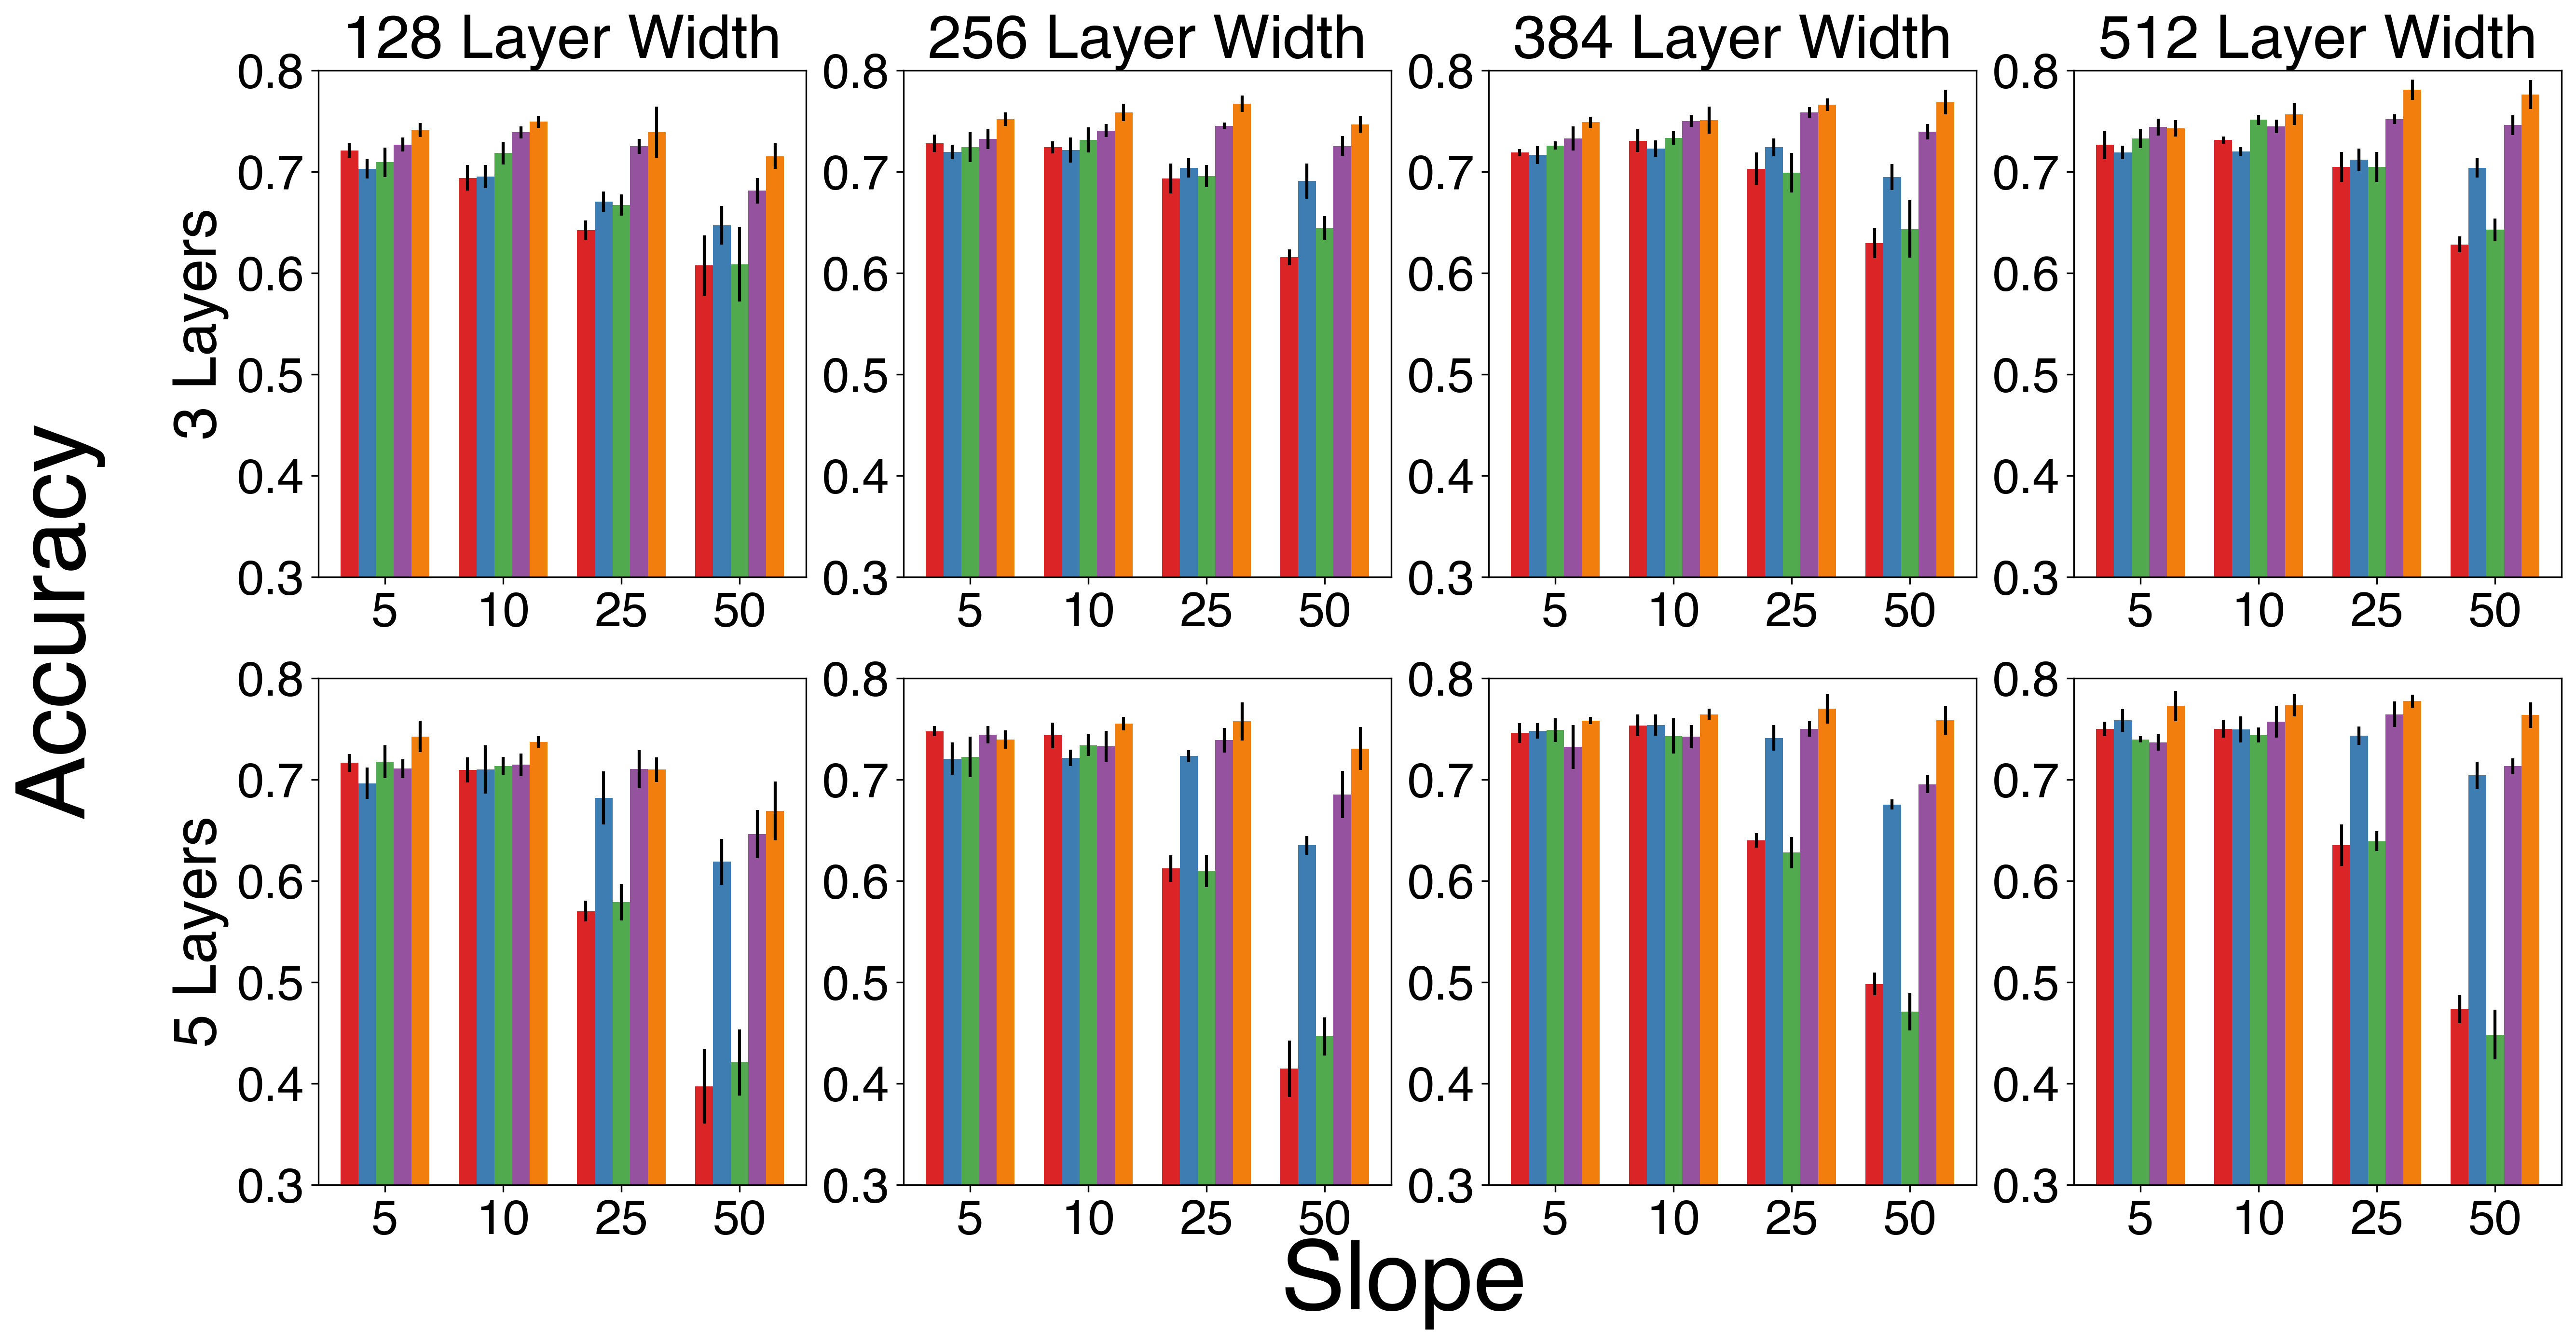

In [2]:
fig = plt.figure(figsize=(20,10),dpi=300)
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
all_means = []
space = [-0.3,-0.15,0,.15,.3]
for n in range(2):
    n_layers = [3,5][n]
    for i in range(4):
        s_means = []
        s_stds = []
        layer_sz = [128,256,384,512][i]
        plt.subplot(2,4,(i+1)+n*4)
        shape = ['o','v','s','+'][i]
        if n == 0:
            plt.title('{} Layer Width'.format(layer_sz),fontsize=30)
        if i==0:
            plt.ylabel('{} Layers'.format(n_layers),fontsize=30)
        for j in range(4):
            
            
            slope = [5,10,25,50][j]
            lr = "001"
            encode = "rate"
            update = "offline"
            measure = "accuracy"
            data = []
            for k in range(4):
                data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
            data = jnp.stack(data)
            m = jnp.mean(data[:,-1],axis=0)
            std = jnp.std(data[:,-1],axis=0)
            s_means.append(m)
            s_stds.append(std)
        s_means = jnp.stack(s_means)
        s_stds = jnp.stack(s_stds)
        all_means.append(s_means)
        
    
        for l in range(5):
            #plt.plot(s_means[:,l],'+',color=colors[l])
            plt.bar(jnp.arange(s_means.shape[0])+space[l],s_means[:,l],width=0.15,color=sb.desaturate(colors[l],0.9),yerr=s_stds[:,l])
            plt.ylim((0.3,0.8))
            plt.xticks([0,1,2,3],[5,10,25,50],fontsize=24)
            plt.yticks(fontsize=24)
            
            
fig.supylabel('Accuracy',fontsize=48)
fig.supxlabel('Slope',fontsize=48)
all_means = jnp.stack(all_means)
plt.savefig("hp_search_acc.png")

In [49]:
slope = 25
encode = "rate"
update = "online"
measure = "accuracy"
all_means = []
all_lr = ['1e-3','8.5e-4','7e-4','5.5e-4','4e-4','2.5e-4','1e-4','8.5e-5','7e-5','5.5e-5','4e-5','2.5e-5','1e-5','8.5e-6']
lrs = ['001','00085','0007','00055','0004','00025','0001','000085','00007','000055','4e-5','25e-6','1e-5','85e-7']
for i in range(3):
    layer_sz = [128,512,512][i]
    n_layers = [3,3,5][i]
    means = []
    for j in range(14):
        lr = ['001','00085','0007','00055','0004','00025','0001','000085','00007','000055','4e-5','25e-6','1e-5','85e-7'][j]
        data = []
        for k in range(4):
            data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_front_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
        data = jnp.stack(data)
        m = jnp.mean(data[:,-1],axis=0)
        means.append(m)
    means = jnp.stack(means)
    all_means.append(means)
all_means = jnp.stack(all_means)

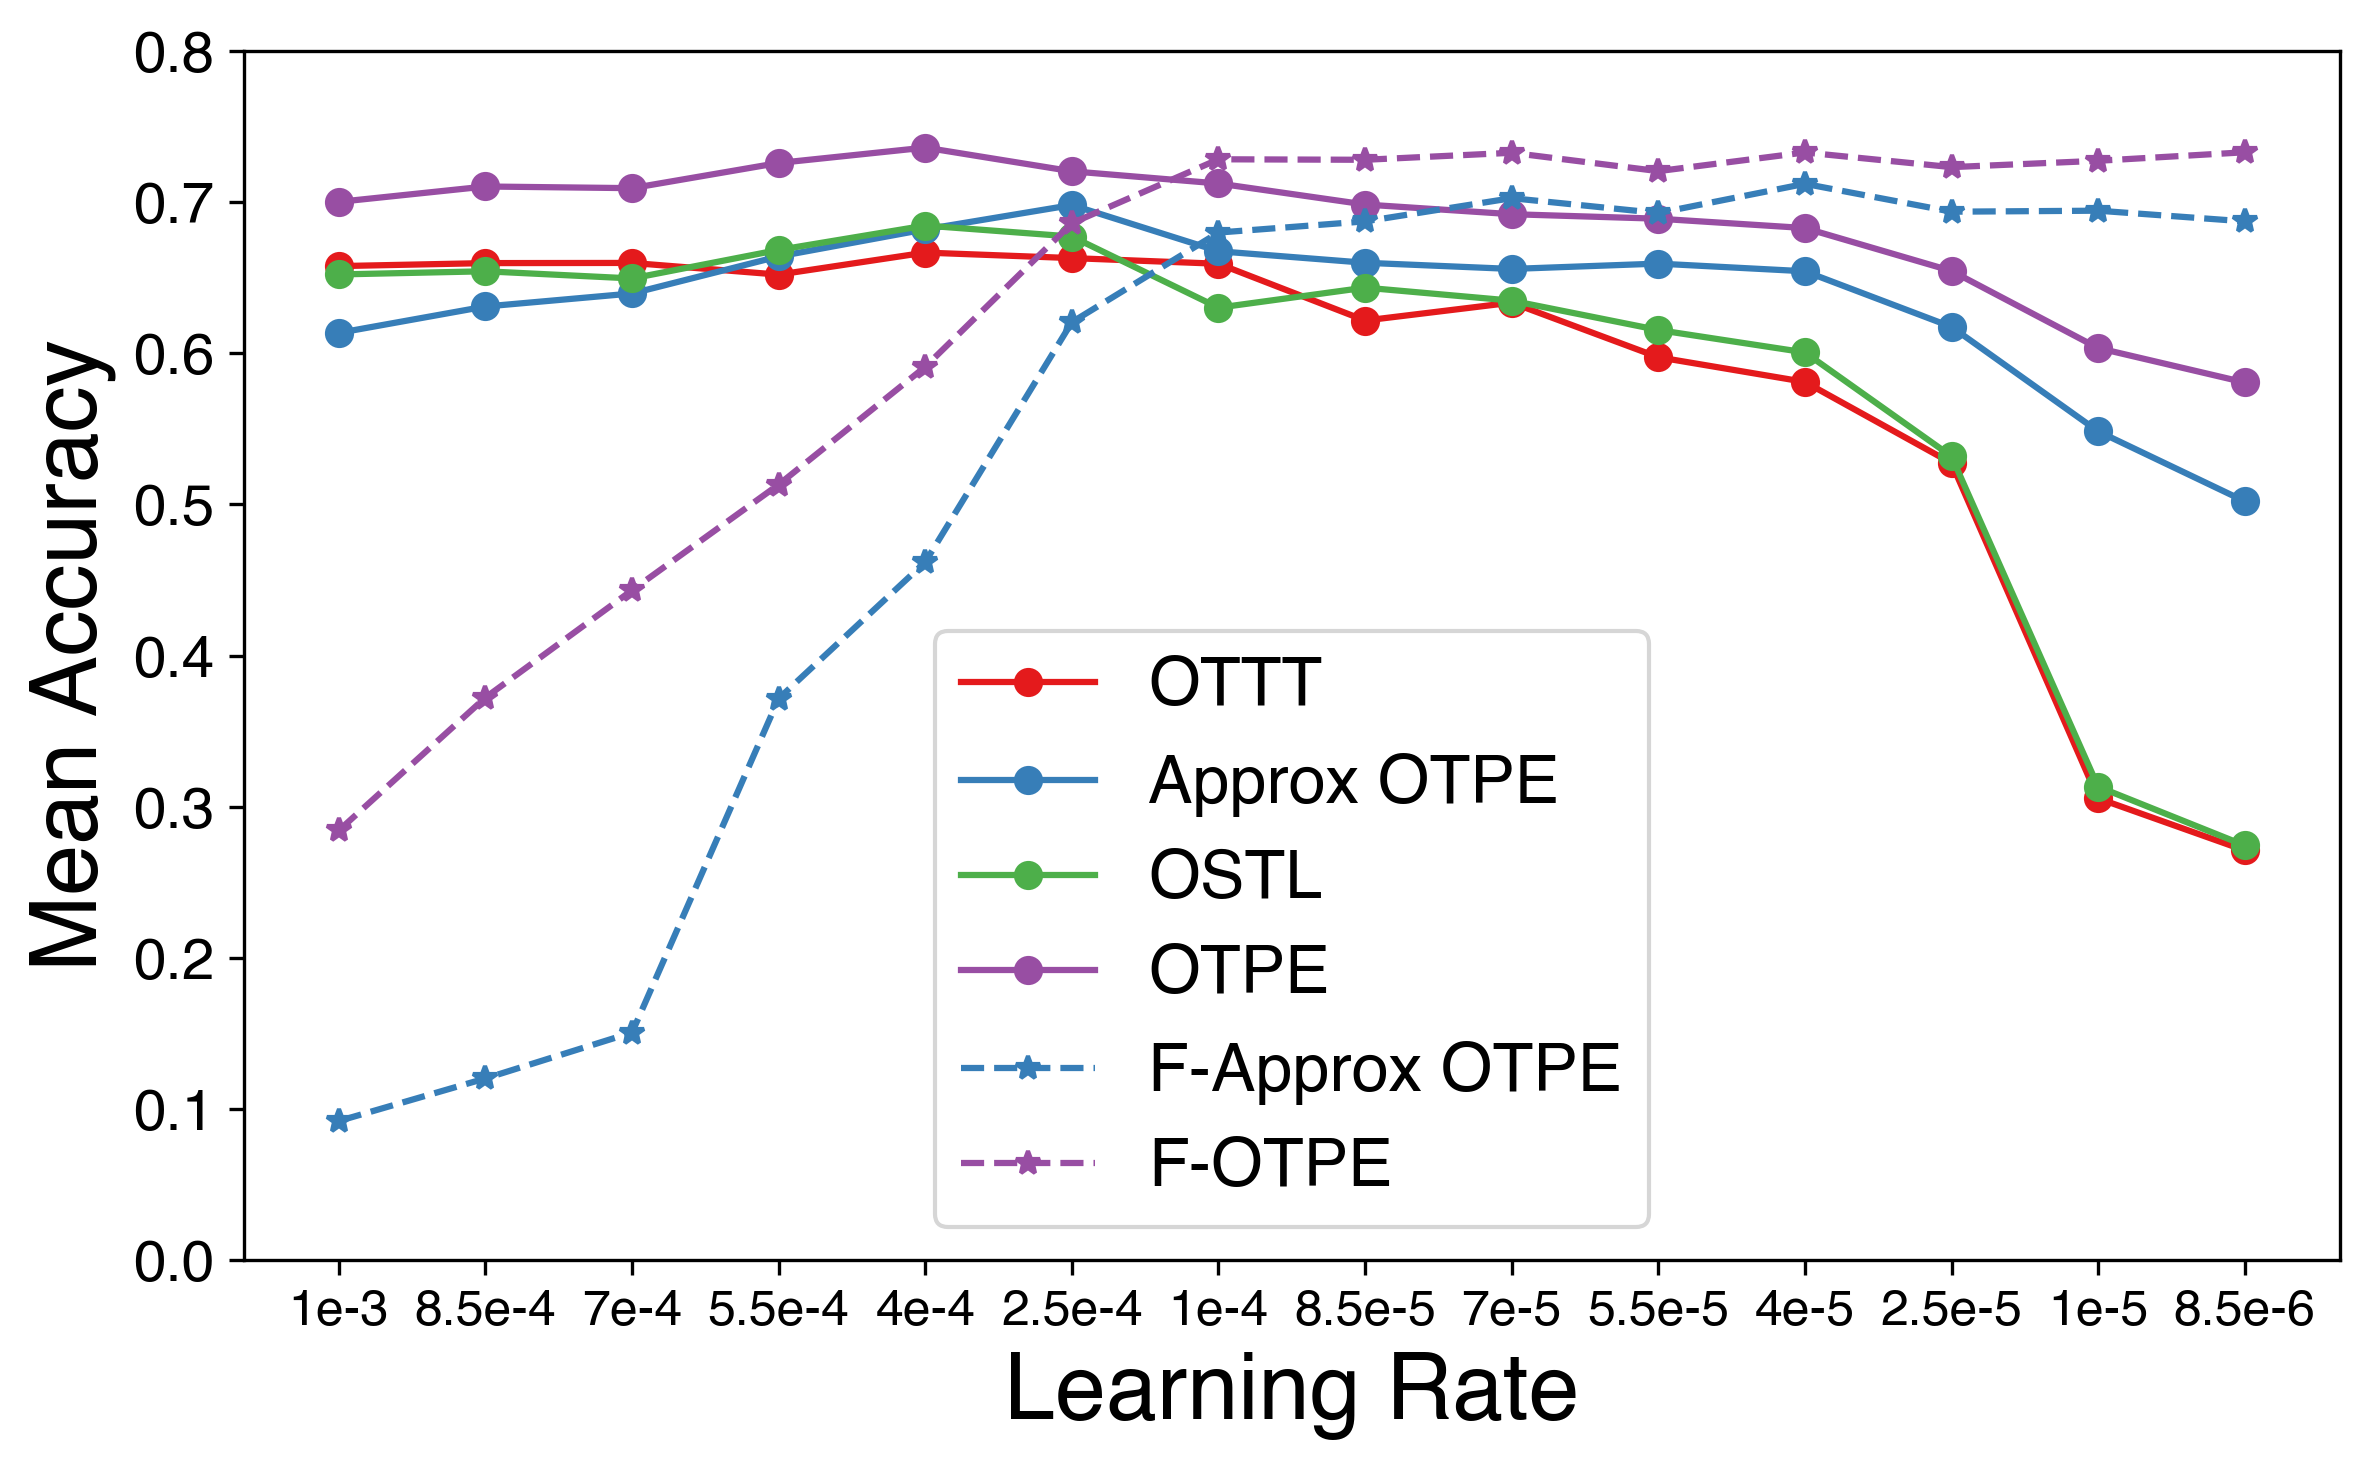

In [52]:
m = 0
plt.figure(figsize=(8,5),dpi=300,layout='tight')
plt.plot(all_means[m,:,0],'-o',color=colors[0])
plt.plot(all_means[m,:,1],'-o',color=colors[1])
plt.plot(all_means[m,:,2],'-o',color=colors[2])
plt.plot(all_means[m,:,3],'-o',color=colors[3])
plt.plot(all_means[m,:,4],'--*',color=colors[1])
plt.plot(all_means[m,:,5],'--*',color=colors[3])
#plt.plot(all_means[1],'--o')
plt.xticks(range(14),all_lr,size=12);
plt.tick_params(axis='y', which='major', labelsize=14)
plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','F-Approx OTPE', 'F-OTPE'], loc='lower center',fontsize=16)
plt.xlabel('Learning Rate',fontsize=22)
plt.ylabel('Mean Accuracy',fontsize=22)
plt.ylim((0,0.8));
plt.savefig('plots/lr_search_128_3.png')

# Accuracy

[0.00895153 0.00848494 0.00885499 0.00924572 0.00797411]
[0.8324255  0.8236661  0.83691955 0.82680315 0.82527715]


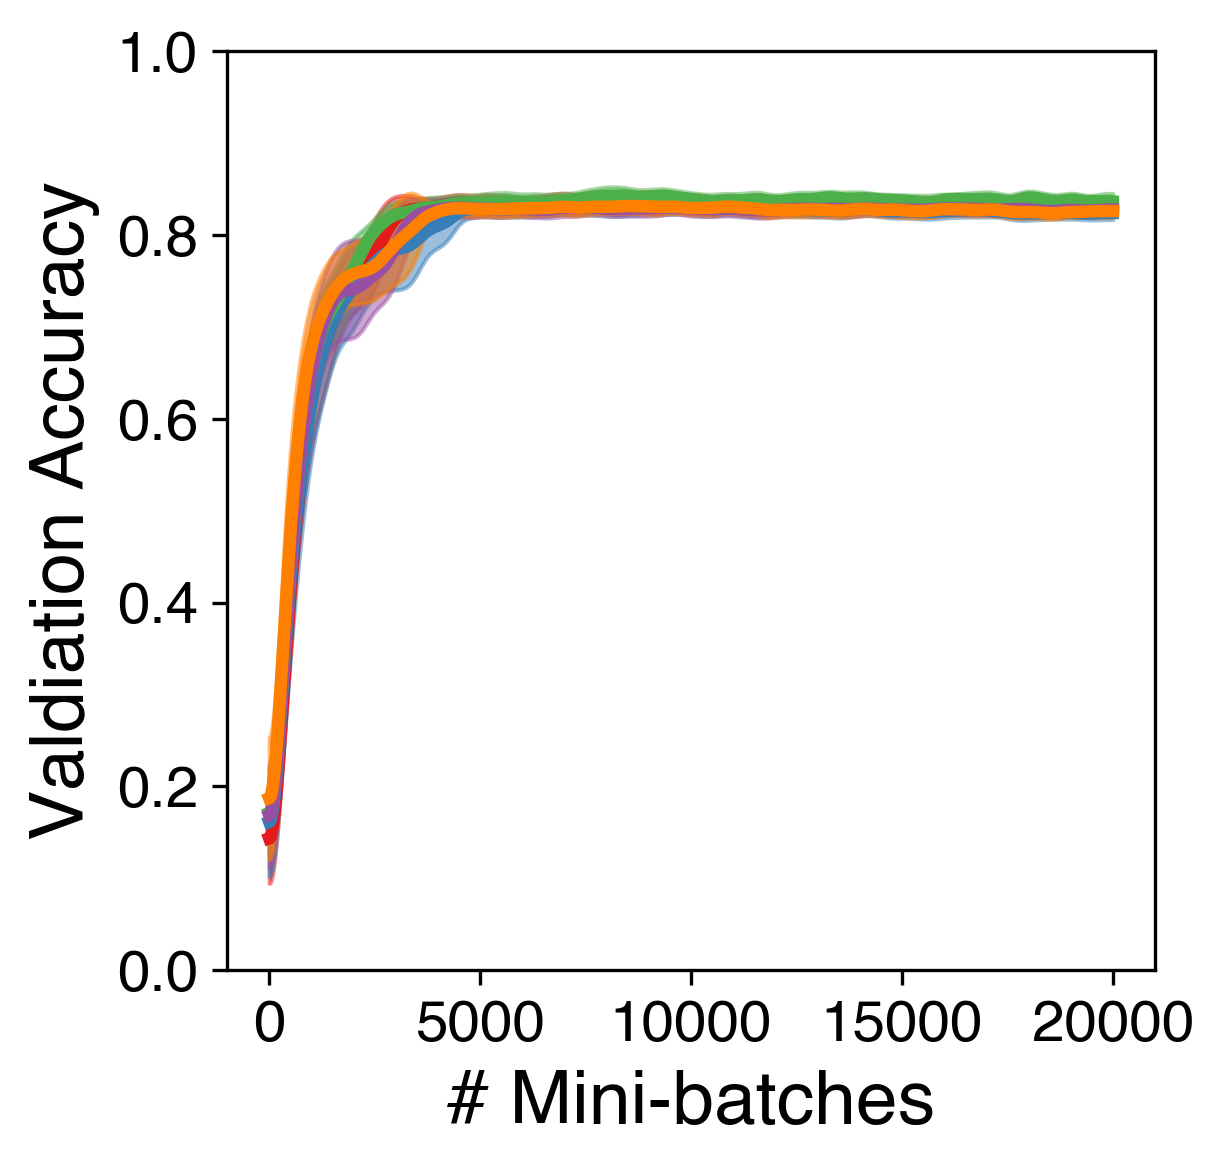

In [66]:
n_layers = 3
layer_sz = 128
slope = 25
lr = "001"
encode = "rate"
update = "offline"
measure = "accuracy"

data = []
for i in range(4):
    data.append(jnp.load("randman_data/{}/sim_{}layer_{}_3dim_50seqlen_20000iter_0manifold_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,encode,slope,lr,i)))
data = jnp.stack(data)
print(jnp.std(data[:,-1000:],axis=(0,1)))
print(jnp.mean(data[:,-1000:],axis=(0,1)))

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.18,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=200).T
upper = gaussian_filter1d(upper.T, sigma=200).T
lower = gaussian_filter1d(lower.T, sigma=200).T

plt.ylim((0,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Valdiation Accuracy",fontname="Helvetica",fontsize=18)
for i in range(5):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(5):
    plt.fill_between(jnp.arange(20000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
plt.tick_params(axis='both', which='major', labelsize=14)

############### Use commented code to add the legend and save the figure #################

#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower right',fontsize=18)
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)
#plt.savefig('plots/rand_{}_{}_s25_acc.png'.format(encode,update))

[0.8532656  0.89403933 0.87244874 0.938174   0.94642645]


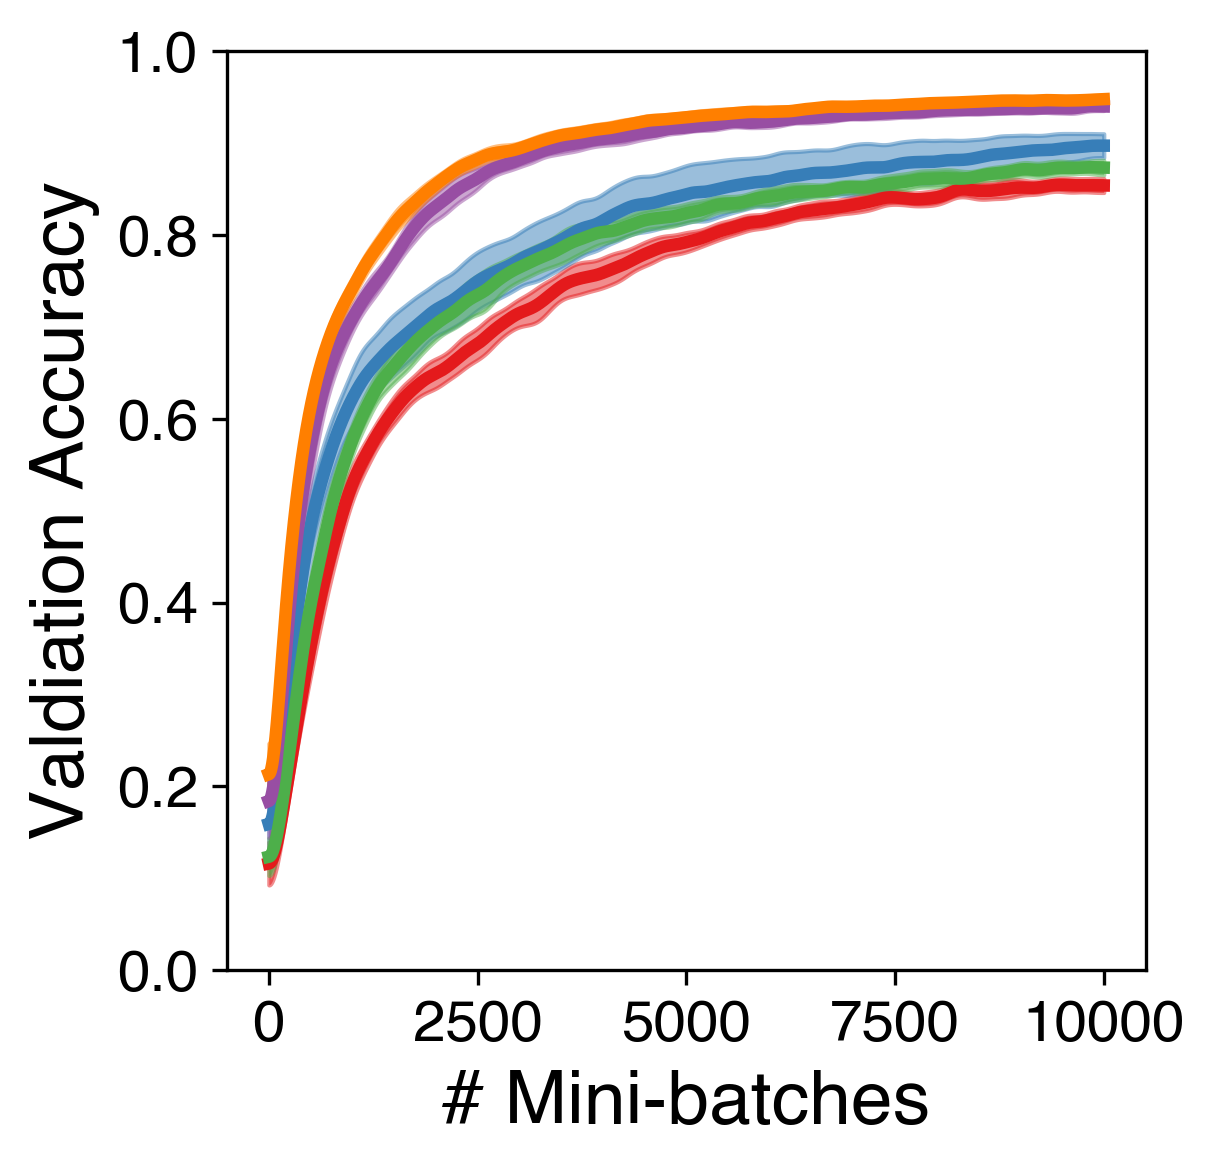

In [47]:
n_layers = 3
layer_sz = 512
slope = 25
lr = "001"
encode = "rate"
update = "offline"
measure = "accuracy"

data = []
for k in range(4):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
data = jnp.stack(data)
data = data[:,0:-1]


colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=100).T
upper = gaussian_filter1d(upper.T, sigma=100).T
lower = gaussian_filter1d(lower.T, sigma=100).T

plt.ylim((0,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Valdiation Accuracy",fontname="Helvetica",fontsize=18)
for i in range(5):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(5):
    plt.fill_between(jnp.arange(10000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
plt.tick_params(axis='both', which='major', labelsize=14)

############### Use commented code to add the legend and save the figure #################

#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)
#plt.savefig('plots/shd_offline_s25_1e-3_512_3_acc.png')

[0.8480994  0.8972745  0.8590163  0.9356598  0.03875981 0.5916157 ]


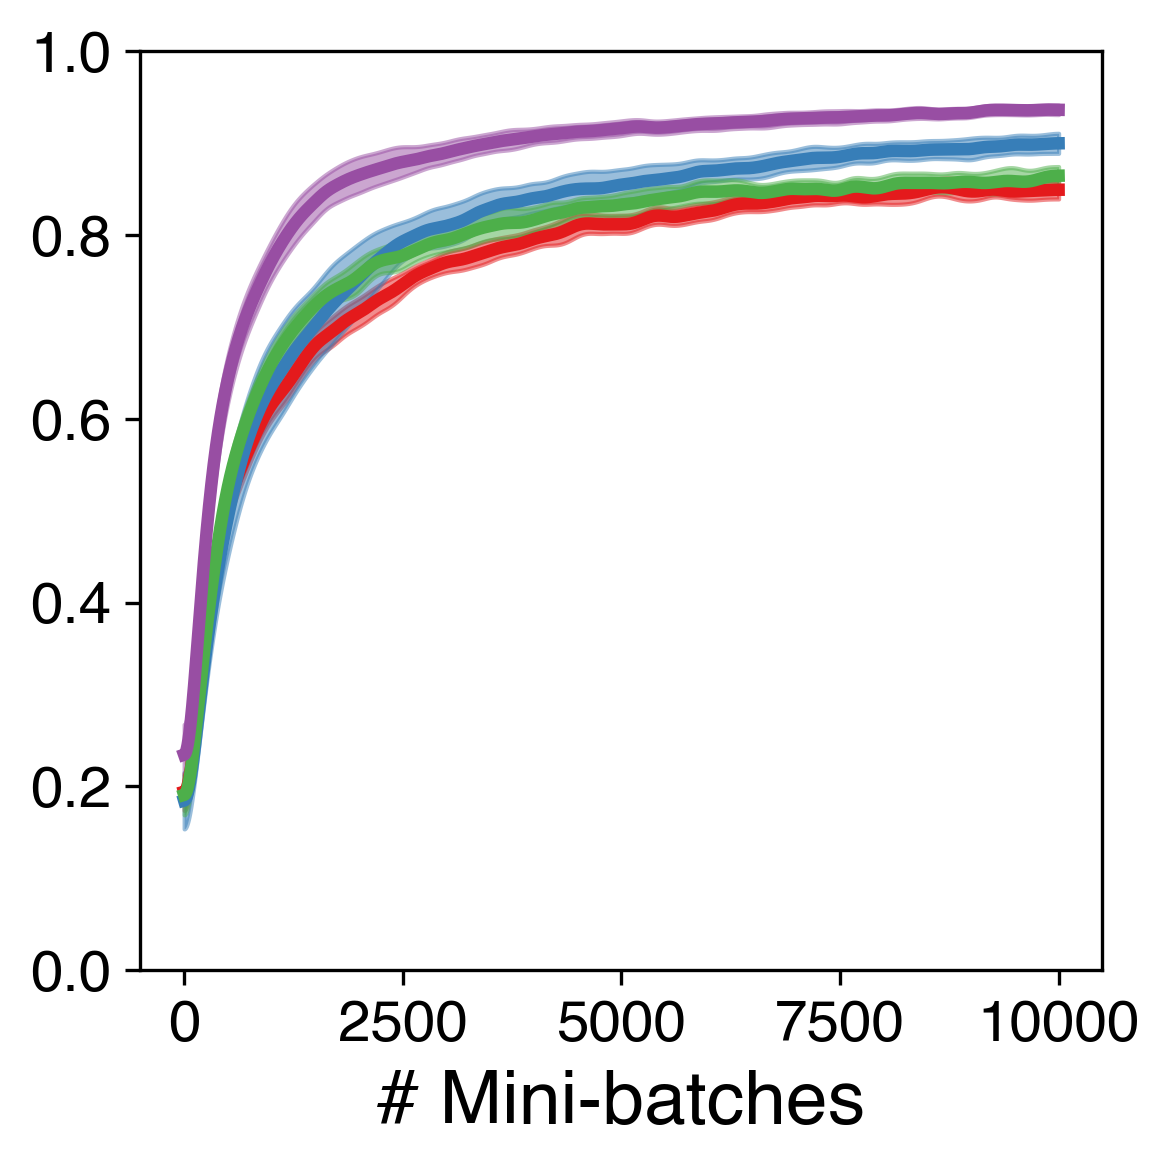

In [50]:
n_layers = 3
layer_sz = 512
slope = 25
lr = "00025"
encode = "time"
update = "online"
measure = "accuracy"

data = []
for k in range(4):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_front_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
data = jnp.stack(data)
data = data[:,0:-1]



colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=100).T
upper = gaussian_filter1d(upper.T, sigma=100).T
lower = gaussian_filter1d(lower.T, sigma=100).T
#plt.plot(jnp.mean(data,axis=0))
plt.ylim((0,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Valdiation Accuracy",fontname="Helvetica",fontsize=18)
for i in range(4):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(4):
    plt.fill_between(jnp.arange(10000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
plt.tick_params(axis='both', which='major', labelsize=14)

############### Use commented code to add the legend and save the figure #################
    
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)
#plt.savefig('plots/shd_online_s25_25e-5_512_3_acc.png')

[0.8481068  0.8730927  0.85901827 0.92779666 0.9286402  0.9518881 ]


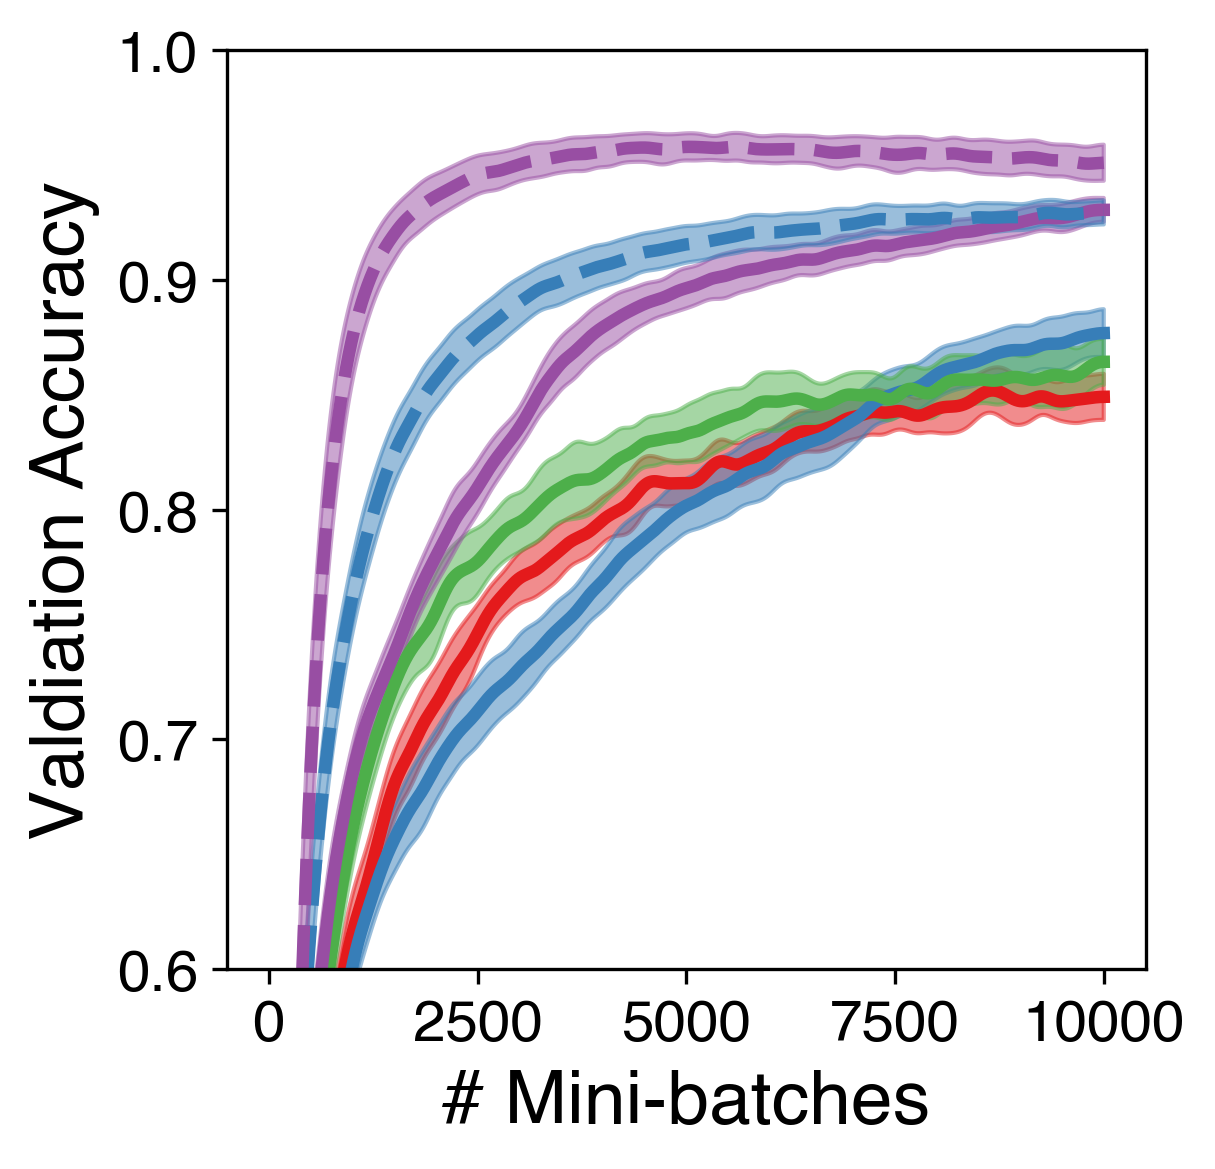

In [99]:
n_layers = 3
layer_sz = 512
slope = 25
encode = "rate"
update = "online"
measure = "accuracy"

d = []
for i in range(6):
    best_lr = lrs[np.argmax(all_means[2,:,i])]
    
    data = []
    for k in range(4):
        data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_front_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,best_lr,k)))
    data = jnp.stack(data)
    data = data[:,0:-1,i]
    d.append(data)
data = np.stack(d,axis=2)

print(jnp.mean(data[:,-1000:],axis=(0,1)))

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#377eb8','#984ea3']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=100).T
upper = gaussian_filter1d(upper.T, sigma=100).T
lower = gaussian_filter1d(lower.T, sigma=100).T
plt.ylim((0.6,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Valdiation Accuracy",fontname="Helvetica",fontsize=18)
for i in range(6):
    if i < 4:
        plt.plot(means[:,i],linewidth=3,color=colors[i])
    else:
        plt.plot(means[:,i],'--',linewidth=3,color=colors[i])

for i in range(6):
    plt.fill_between(jnp.arange(10000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
    
plt.tick_params(axis='both', which='major', labelsize=14)

############### Use commented code to add the legend and save the figure #################

#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','F-Approx OTPE', 'F-OTPE'], loc='lower right',fontsize=15)
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)
#plt.savefig('plots/shd_online_s25_best_512_5_acc.png')

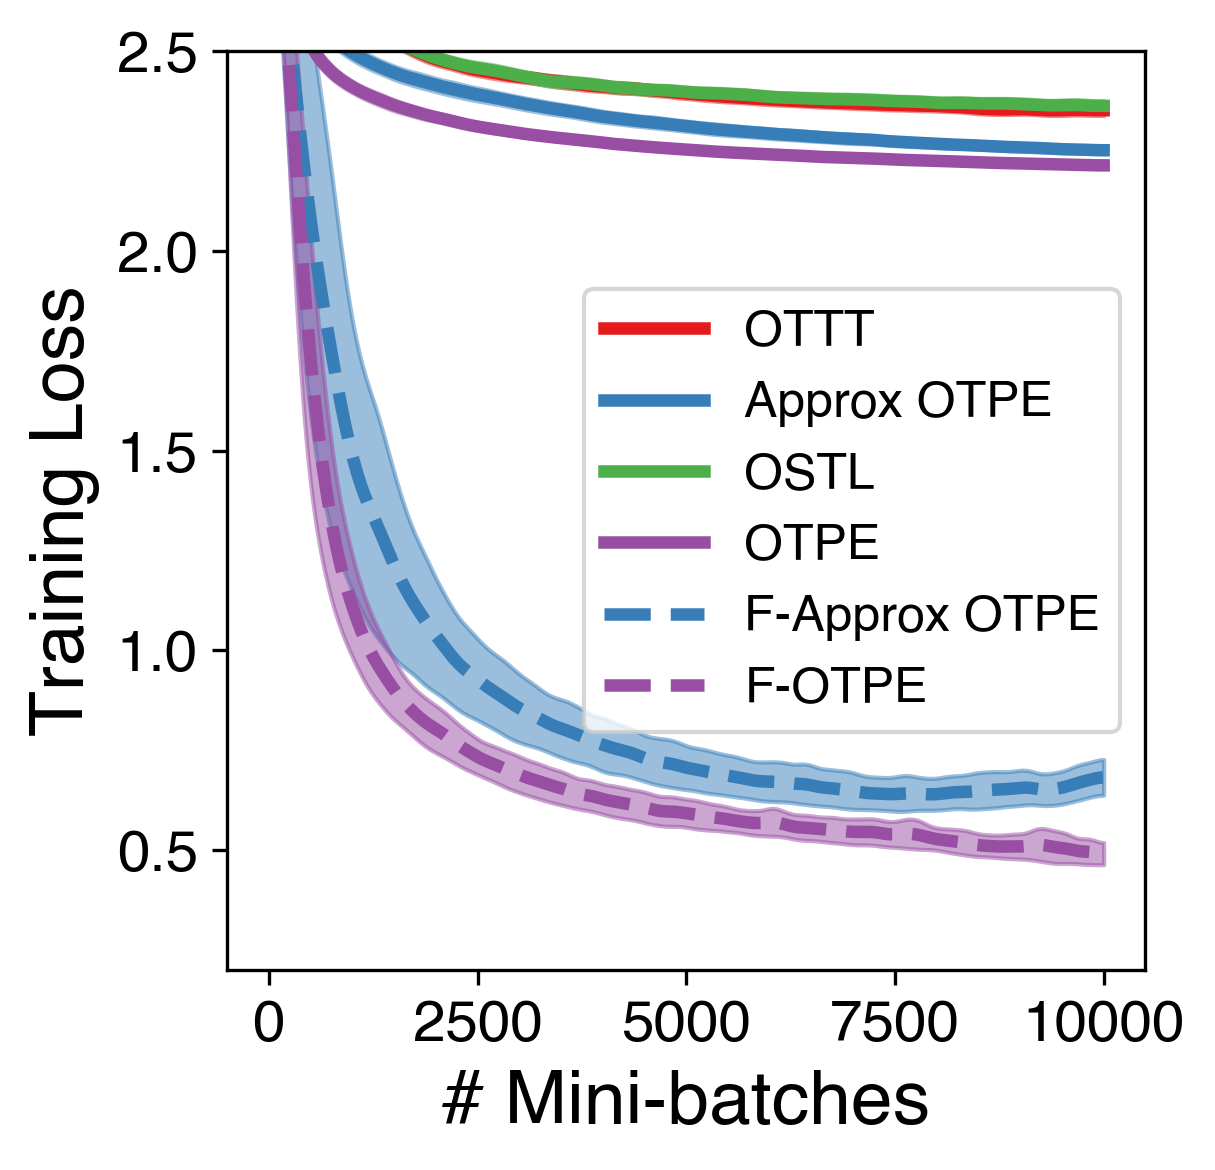

In [141]:
n_layers = 5
layer_sz = 512
slope = 25
lr = "000085"
encode = "rate"
update = "online"
measure = "loss"

d = []
for i in range(6):
    best_lr = lrs[np.argmax(all_means[1,:,i])]
    
    data = []
    for k in range(4):
        data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_front_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,best_lr,k)))
    data = jnp.stack(data)
    data = data[:,:,i]
    d.append(data)
data = np.stack(d,axis=2)

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#377eb8','#984ea3']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=100).T
upper = gaussian_filter1d(upper.T, sigma=100).T
lower = gaussian_filter1d(lower.T, sigma=100).T

plt.ylim((0.2,2.5))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Training Loss",fontname="Helvetica",fontsize=18)
for i in range(6):
    if i < 4:
        plt.plot(means[:,i],linewidth=3,color=colors[i])
    else:
        plt.plot(means[:,i],'--',linewidth=3,color=colors[i])

for i in range(6):
    plt.fill_between(jnp.arange(10000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
    
plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','F-Approx OTPE','F-OTPE'], loc='center right',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('plots/shd_online_s25_best_512_5_loss.png')

# Loss

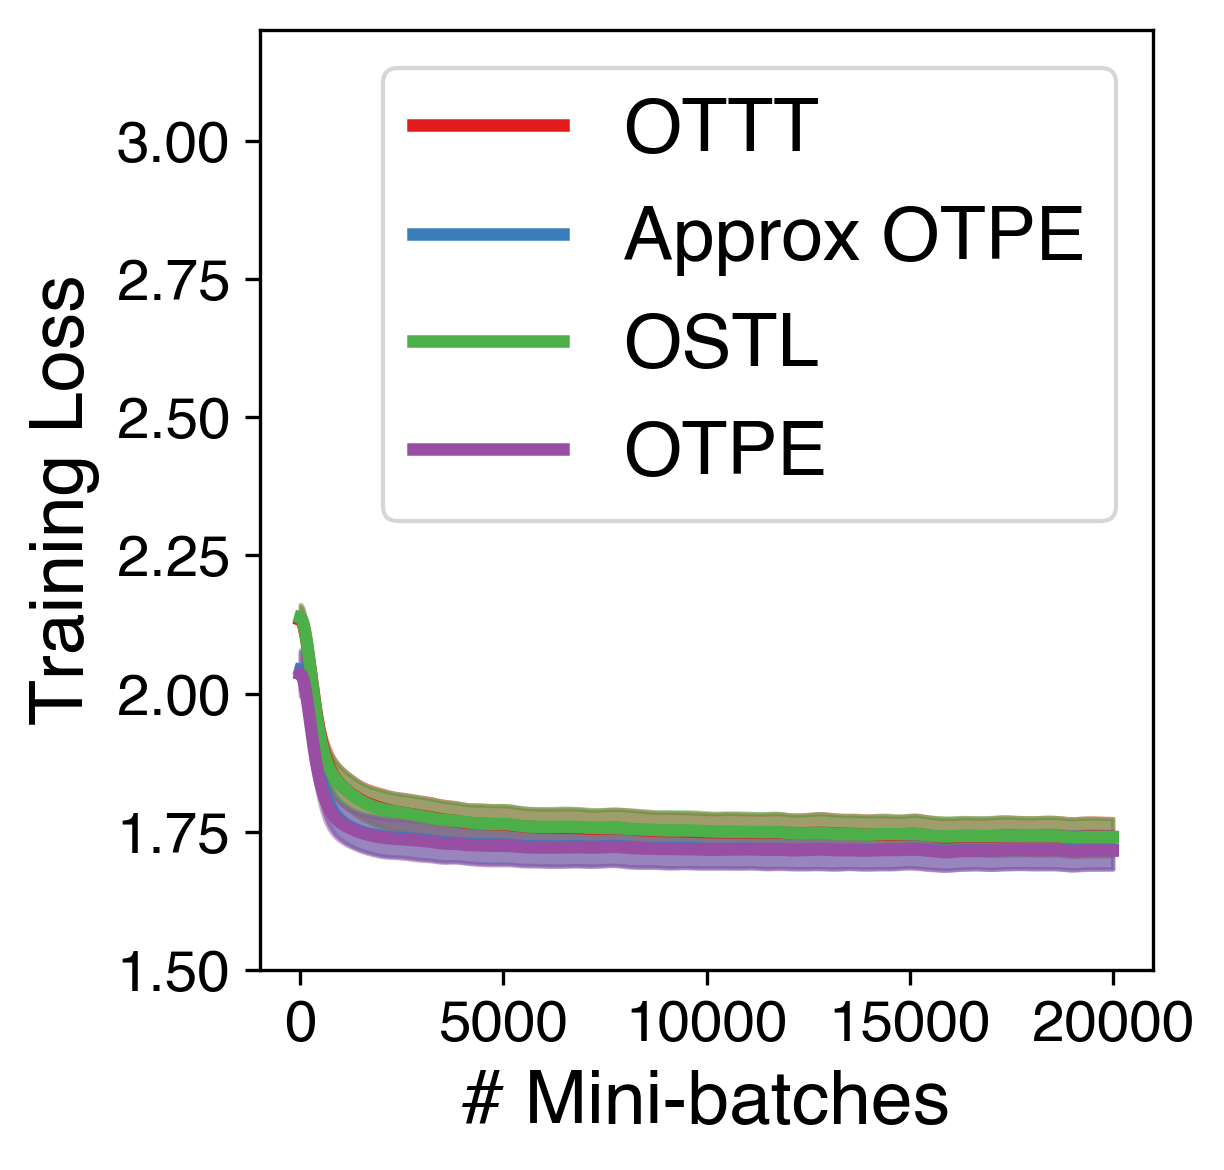

In [58]:
n_layers = 3
layer_sz = 128
slope = 25
lr = "0004"
encode = "rate"
update = "online"
measure = "loss"
n=4
if update=='offline':
    n=5

data = []
for i in range(4):
    data.append(jnp.load("randman_data/{}/sim_{}layer_{}_3dim_50seqlen_20000iter_0manifold_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,encode,slope,lr,i)))
data = jnp.stack(data)



colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.18,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=200).T
upper = gaussian_filter1d(upper.T, sigma=200).T
lower = gaussian_filter1d(lower.T, sigma=200).T

plt.ylim((1.5,3.2))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Training Loss",fontname="Helvetica",fontsize=18)
for i in range(n):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(n):
    plt.fill_between(jnp.arange(20000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])

plt.tick_params(axis='both', which='major', labelsize=14)
if encode=='rate':
    plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'][:n], loc='upper right',fontsize=18)
plt.savefig('plots/rand_{}_{}_s25_loss.png'.format(encode,update))

In [ ]:
n_layers = 3
layer_sz = 256
slope = 25
lr = "001"
encode = "time"
update = "offline"
measure = "loss"

n=4
if update=='offline':
    n=5

data = []
for i in range(4):
    data.append(jnp.load("randman_data/{}/sim_{}layer_{}_3dim_50seqlen_5000iter_0manifold_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,encode,slope,lr,i)))
data = jnp.stack(data)



colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight')
else:
    fig = plt.figure(figsize=(4,4),layout='tight')

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=50).T
upper = gaussian_filter1d(upper.T, sigma=50).T
lower = gaussian_filter1d(lower.T, sigma=50).T

plt.ylim((1.5,3.2))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=15)
if encode=='rate':
    plt.ylabel("Loss",fontname="Helvetica",fontsize=15)
for i in range(n):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(n):
    plt.fill_between(jnp.arange(5000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
    
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'][:n], loc='upper right',fontsize=18)
plt.savefig('plots/rand_{}_{}_s25_loss.svg'.format(encode,update))

[2.3142996 2.2612648 2.3014212 2.198371  2.1956477]


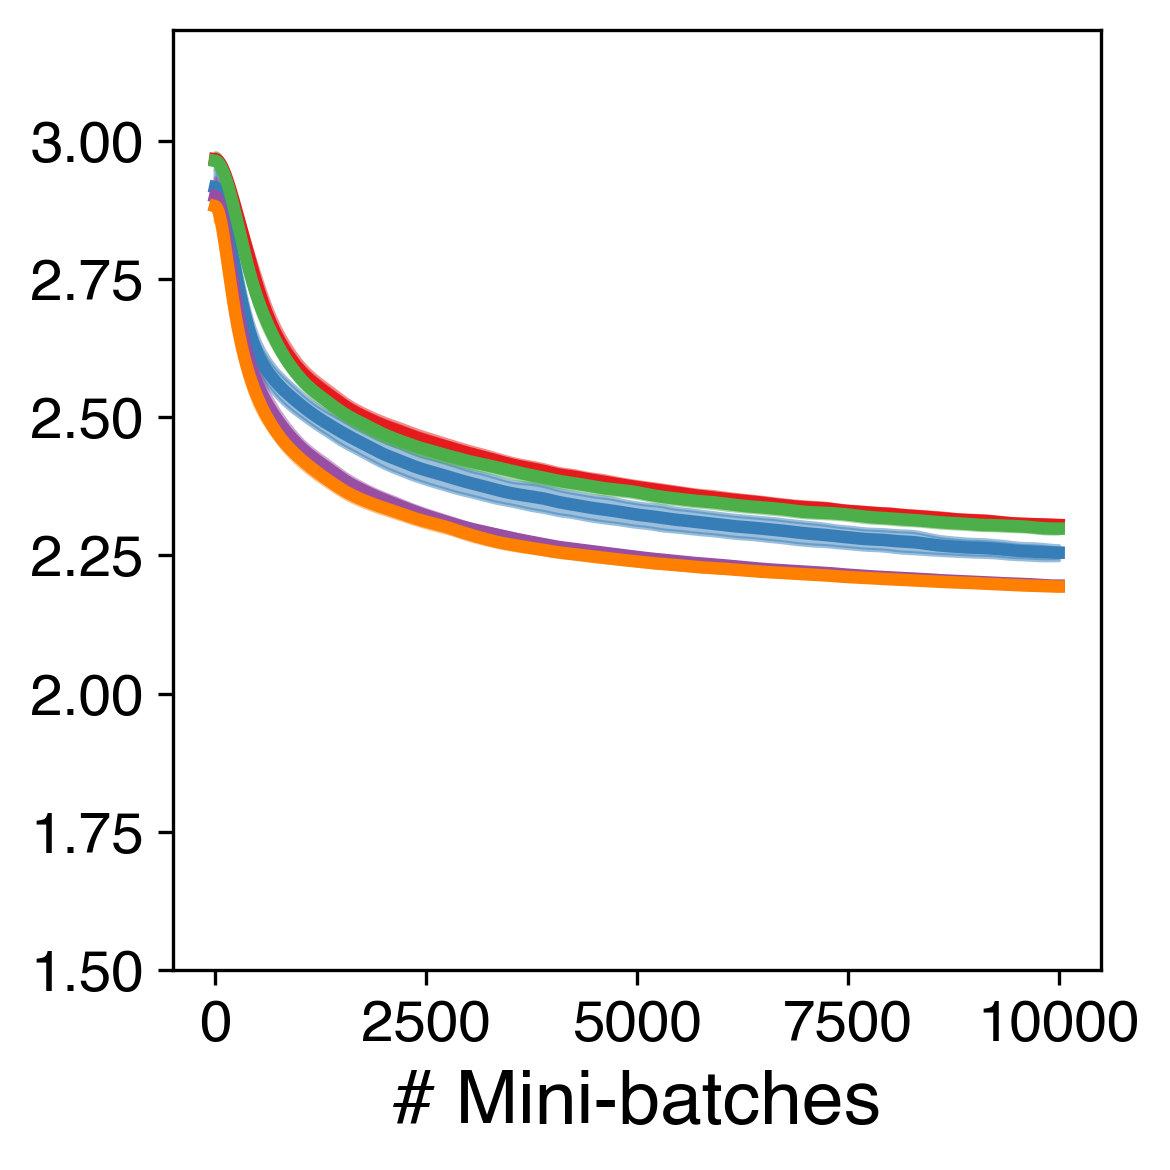

In [62]:
n_layers = 3
layer_sz = 512
slope = 25
lr = "001"
encode = "time"
update = "offline"
measure = "loss"

data = []
for k in range(4):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
data = jnp.stack(data)
print(jnp.mean(data[:,-1],axis=0))


colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.18,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=100).T
upper = gaussian_filter1d(upper.T, sigma=100).T
lower = gaussian_filter1d(lower.T, sigma=100).T

plt.ylim((1.5,3.2))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Valdiation Accuracy",fontname="Helvetica",fontsize=18)
for i in range(5):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(5):
    plt.fill_between(jnp.arange(10000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
    
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('plots/shd_offline_s25_1e-3_512_3_loss.png')

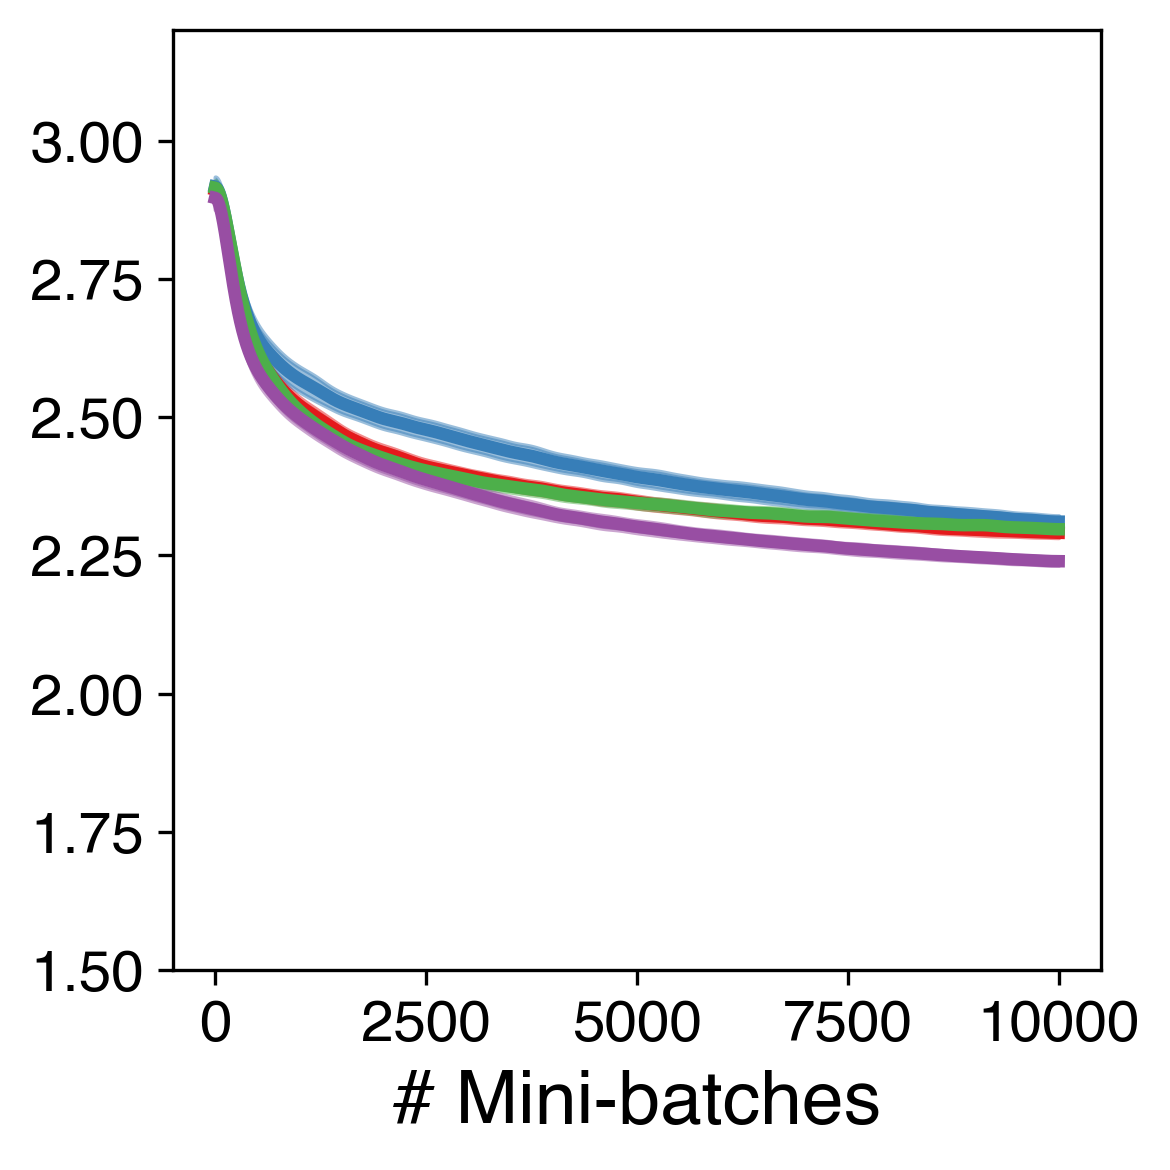

In [119]:
n_layers = 3
layer_sz = 512
slope = 25
lr = "00025"
encode = "time"
update = "online"
measure = "loss"

d = []
for i in range(4):
    best_lr = lrs[np.argmax(all_means[1,:,i])]
    
    data = []
    for k in range(4):
        data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_front_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,best_lr,k)))
    data = jnp.stack(data)
    data = data[:,:,i]
    d.append(data)
data = np.stack(d,axis=2)

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight')
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=100).T
upper = gaussian_filter1d(upper.T, sigma=100).T
lower = gaussian_filter1d(lower.T, sigma=100).T

plt.ylim((1.5,3.2))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Valdiation Accuracy",fontname="Helvetica",fontsize=18)
for i in range(4):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(4):
    plt.fill_between(jnp.arange(10000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
    
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE','BPTT'], loc='lower right',fontsize=18)
plt.savefig('plots/shd_online_s25_best_512_3_loss.png')

# Model Cosine Similarity

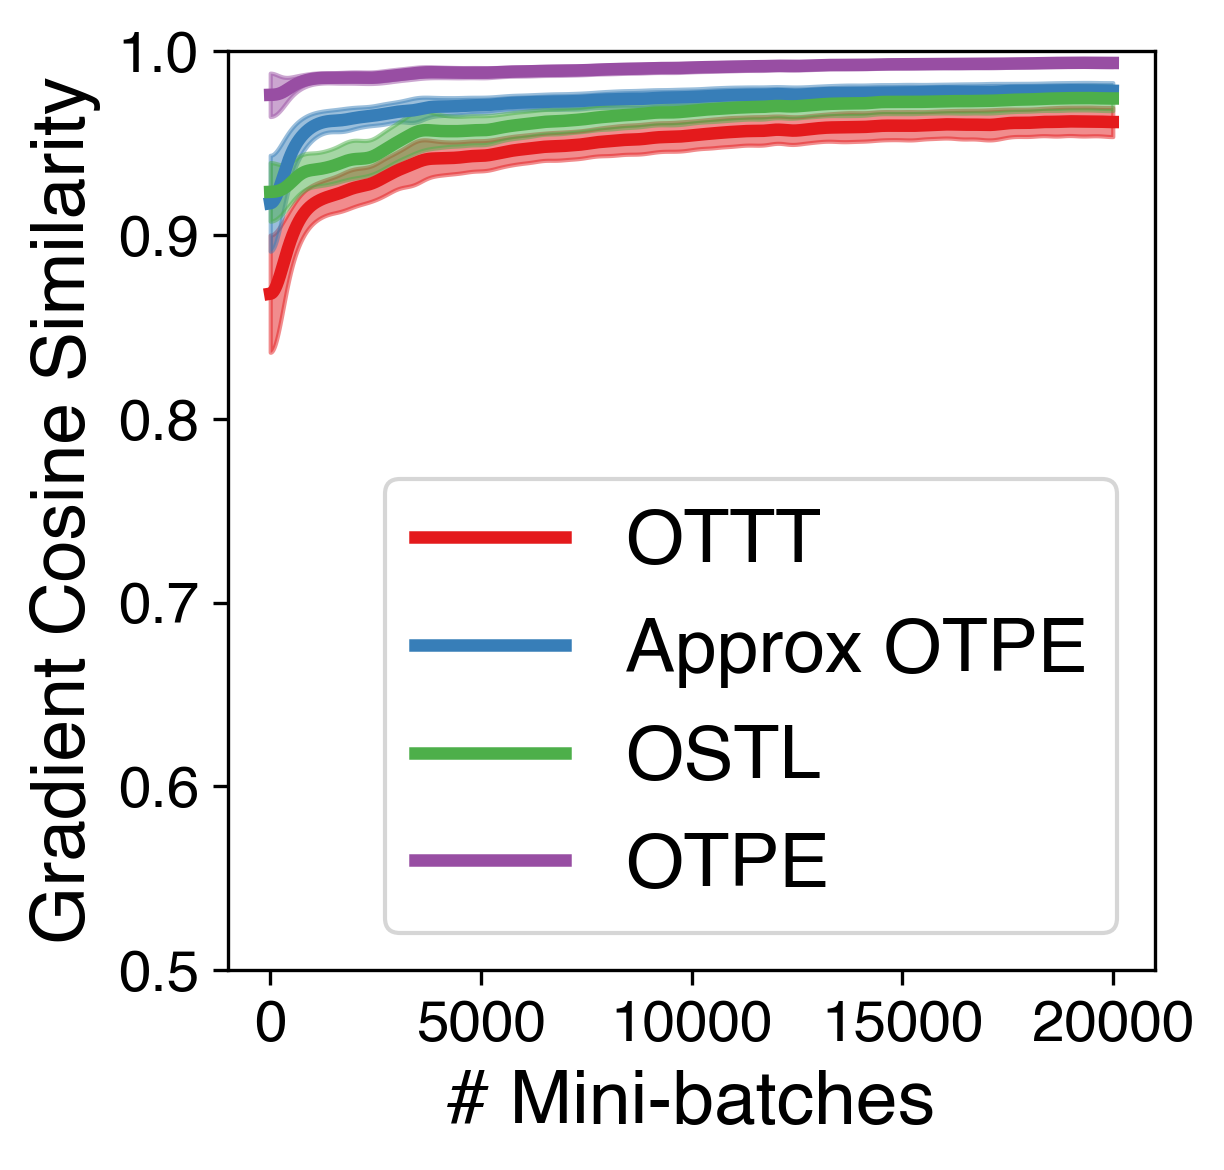

In [75]:
n_layers = 3
layer_sz = 128
slope = 25
lr = "001"
encode = "rate"
update = "offline"
measure = "model_cosine_similarity"

data = []
for i in range(4):
    data.append(jnp.load("randman_data/{}/sim_{}layer_{}_3dim_50seqlen_20000iter_0manifold_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,encode,slope,lr,i)))
data = jnp.stack(data)


colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.18,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=200).T
upper = gaussian_filter1d(upper.T, sigma=200).T
lower = gaussian_filter1d(lower.T, sigma=200).T

plt.ylim((0.5,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Gradient Cosine Similarity",fontname="Helvetica",fontsize=18)
for i in range(4):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(4):
    plt.fill_between(jnp.arange(20000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower right',fontsize=18)
plt.savefig('plots/rand_{}_{}_s25_mcos.png'.format(encode,update))

[0.94481707 0.9719992  0.9517648  0.99102926]


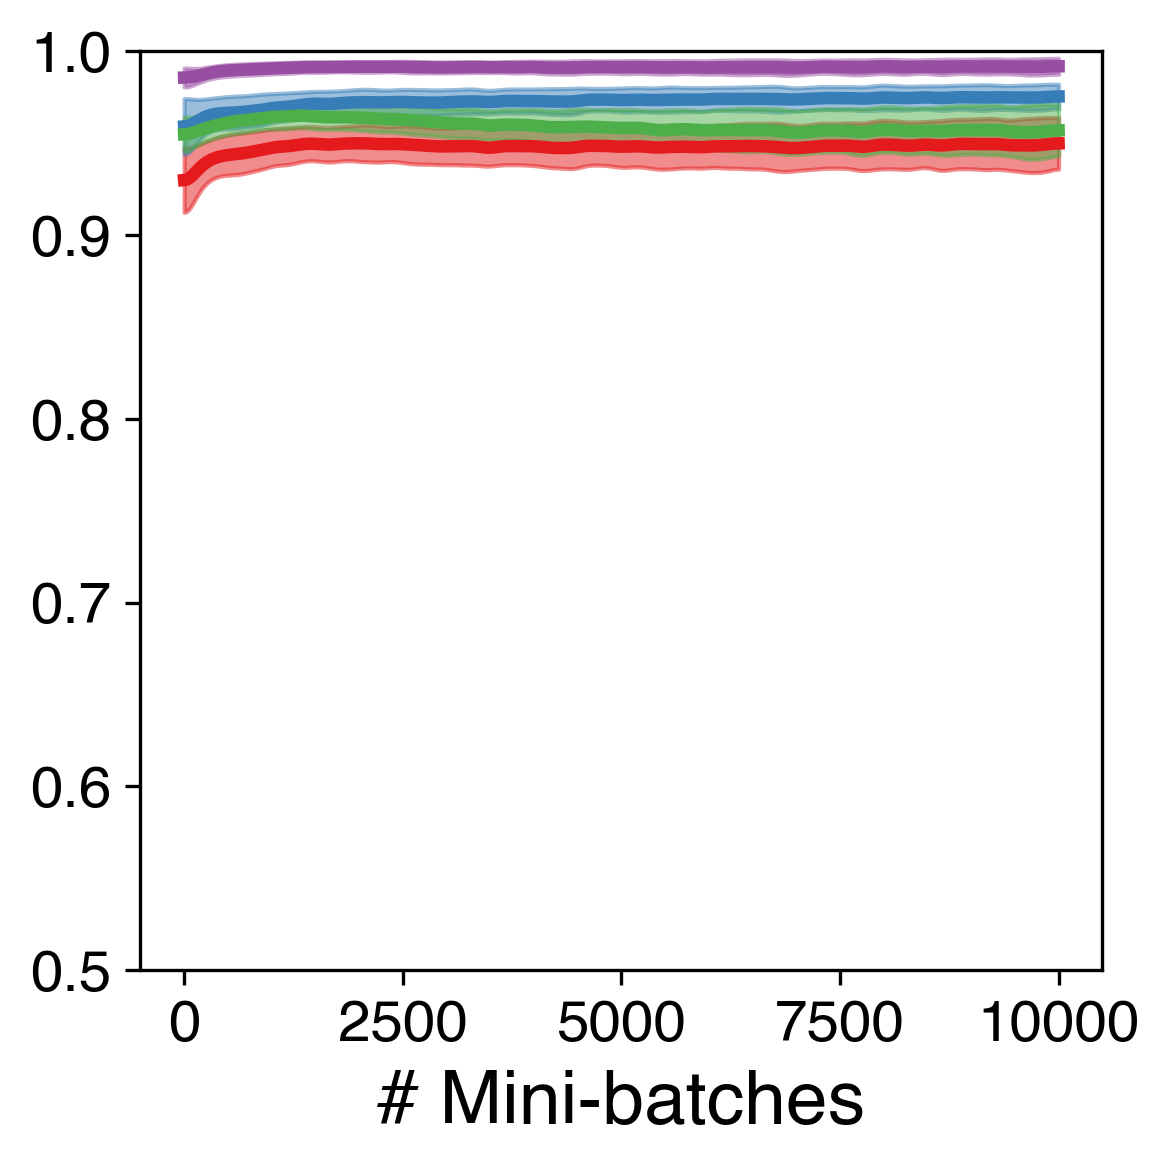

In [88]:
n_layers = 3
layer_sz = 512
slope = 25
lr = "001"
encode = "time"
update = "offline"

measure = "model_cosine_similarity"

data = []
for k in range(4):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
data = jnp.stack(data)



colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight')
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=100).T
upper = gaussian_filter1d(upper.T, sigma=100).T
lower = gaussian_filter1d(lower.T, sigma=100).T

plt.ylim((0.5,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Valdiation Accuracy",fontname="Helvetica",fontsize=18)
for i in range(4):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(4):
    plt.fill_between(jnp.arange(10000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])
    
    

plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower right',fontsize=18)
#plt.savefig('plots/shd_offline_s25_1e-3_512_3_mcos.png')

# Layer Cosine Similarity

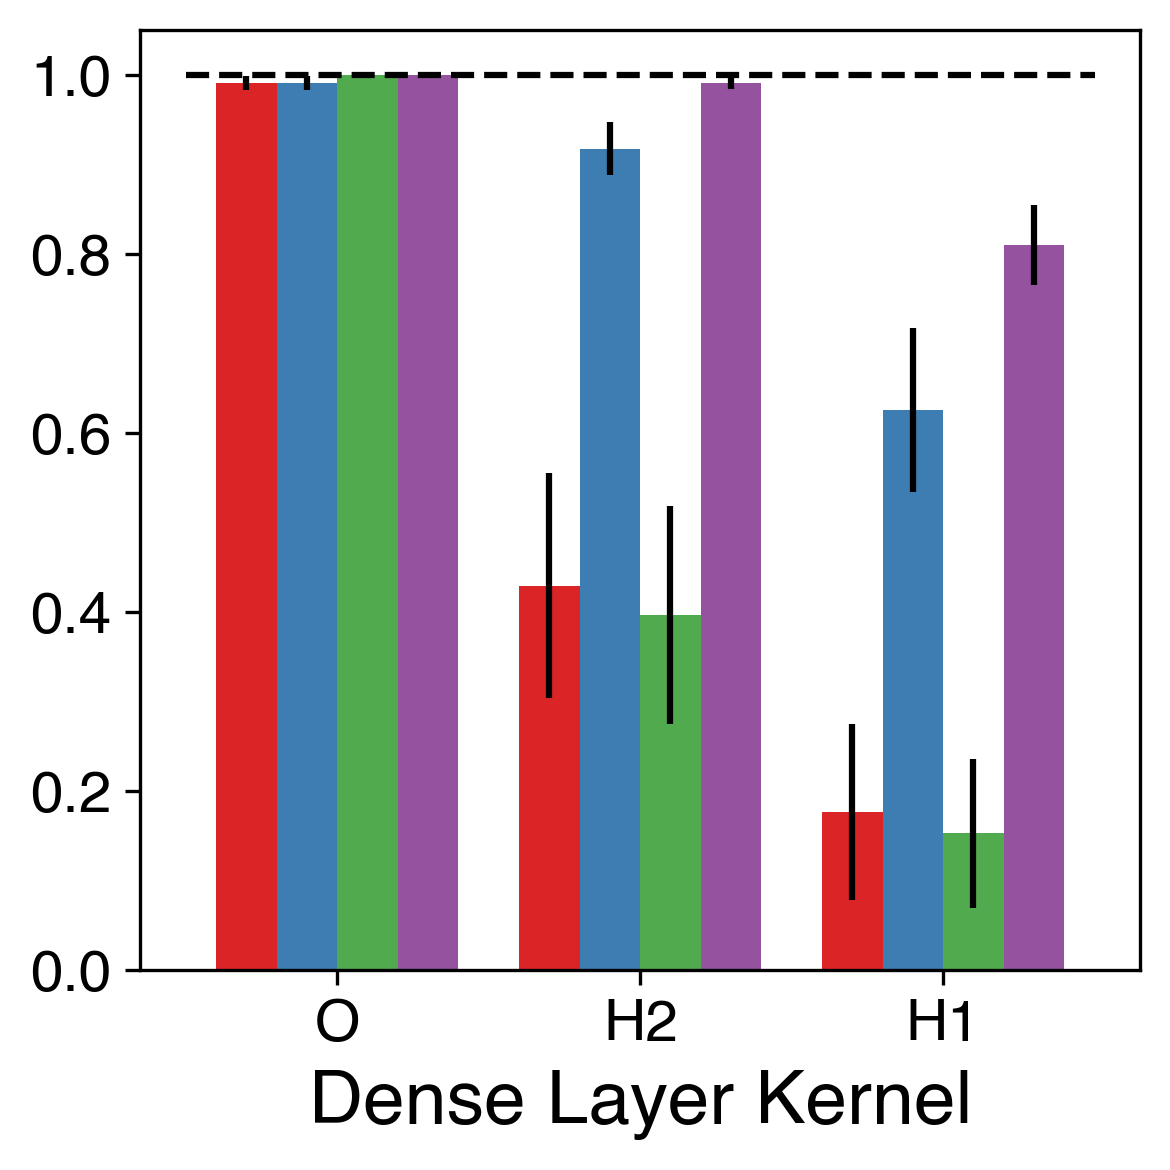

In [82]:
n_layers = 3
layer_sz = 128
slope = 25
lr = "001"
encode = "time"
update = "offline"
measure = "layer_cosine_similarity"

data = []
for i in range(4):
    data.append(jnp.load("randman_data/{}/sim_{}layer_{}_3dim_50seqlen_20000iter_0manifold_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,encode,slope,lr,i)))
data = jnp.stack(data)


if encode == 'rate':
    fig = plt.figure(figsize=(4.18,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

vals = data

stds = jnp.nanstd(vals,axis=(0,1))[:,1::2]
means = jnp.mean(vals,axis=(0,1))[:,1::2]

plt.bar(jnp.arange(means.shape[1])-0.3,means[0],width=0.2,color=sb.desaturate(colors[0],0.9),yerr=stds[0])
plt.bar(jnp.arange(means.shape[1])-0.1,means[1],width=0.2,color=sb.desaturate(colors[1],0.9),yerr=stds[1])
plt.bar(jnp.arange(means.shape[1])+0.1,means[2],width=0.2,color=sb.desaturate(colors[2],0.9),yerr=stds[2])
plt.bar(jnp.arange(means.shape[1])+0.3,means[3],width=0.2,color=sb.desaturate(colors[3],0.9),yerr=stds[3])

plt.xticks([0,1,2],labels=['H1', 'H2', 'O'][::-1])

plt.xlabel('Dense Layer Kernel',fontsize=18)
if encode=='rate':
    plt.ylabel("Gradient Cosine Similarity",fontname="Helvetica",fontsize=18)
    plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower left',fontsize=15)

plt.hlines(1,-0.5,2.5,'k',linestyle='dashed')
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('plots/rand_{}_{}_s25_lcos.png'.format(encode,update))

[[0.77432203 0.99416554 0.42739326 0.55124253 0.13909222 0.16895   ]
 [0.77432203 0.99416554 0.50892425 0.94277275 0.22372276 0.8189835 ]
 [0.9999876  0.9999889  0.5454453  0.48906898 0.21320865 0.14163618]
 [0.9999876  0.9999889  0.99433386 0.9936277  0.82674813 0.8621863 ]]


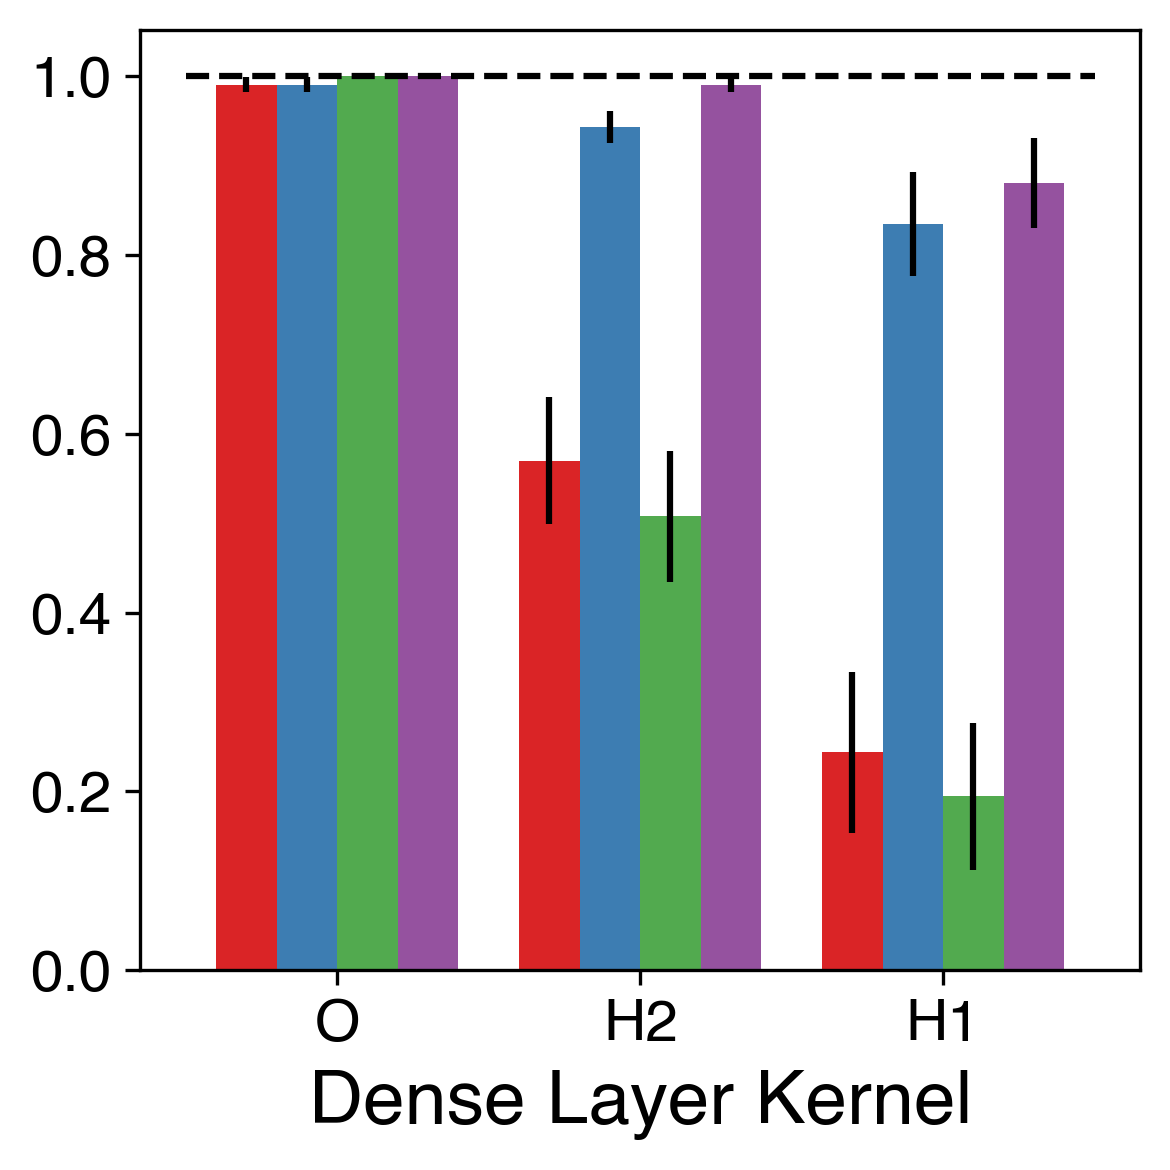

In [68]:
n_layers = 3
layer_sz = 512
slope = 25
lr = "001"
encode = "time"
update = "offline"
measure = "layer_cosine_similarity"


data = []
for k in range(4):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
data = jnp.stack(data)


if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight')
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

vals = data

stds = jnp.nanstd(vals,axis=(0,1))[:,1::2]
means = jnp.mean(vals,axis=(0,1))[:,1::2]

plt.bar(jnp.arange(means.shape[1])-0.3,means[0],width=0.2,color=sb.desaturate(colors[0],0.9),yerr=stds[0])
plt.bar(jnp.arange(means.shape[1])-0.1,means[1],width=0.2,color=sb.desaturate(colors[1],0.9),yerr=stds[1])
plt.bar(jnp.arange(means.shape[1])+0.1,means[2],width=0.2,color=sb.desaturate(colors[2],0.9),yerr=stds[2])
plt.bar(jnp.arange(means.shape[1])+0.3,means[3],width=0.2,color=sb.desaturate(colors[3],0.9),yerr=stds[3])

plt.xticks([0,1,2],labels=['H1', 'H2', 'O'][::-1])

plt.xlabel('Dense Layer Kernel',fontsize=18)
if encode=='rate':
    plt.ylabel("Gradient Cosine Similarity",fontname="Helvetica",fontsize=18)

#plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower left',fontsize=15)

plt.hlines(1,-0.5,2.5,'k',linestyle='dashed')
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('plots/shd_offline_s25_1e-3_512_3_lcos.png')

[[0.90036094 0.9922809  0.43458617 0.5479455  0.16354169 0.23773955
  0.09255863 0.1329583  0.07434297 0.09931788]
 [0.90036094 0.9922809  0.7065289  0.9280075  0.47529757 0.87766314
  0.3204404  0.80309504 0.23742574 0.59025687]
 [1.         1.         0.478712   0.49669316 0.20084961 0.20272502
  0.11737542 0.11403918 0.09528881 0.08287555]
 [1.         1.         0.9916479  0.9922161  0.8535477  0.84246063
  0.6737143  0.73597145 0.47664642 0.5613013 ]]


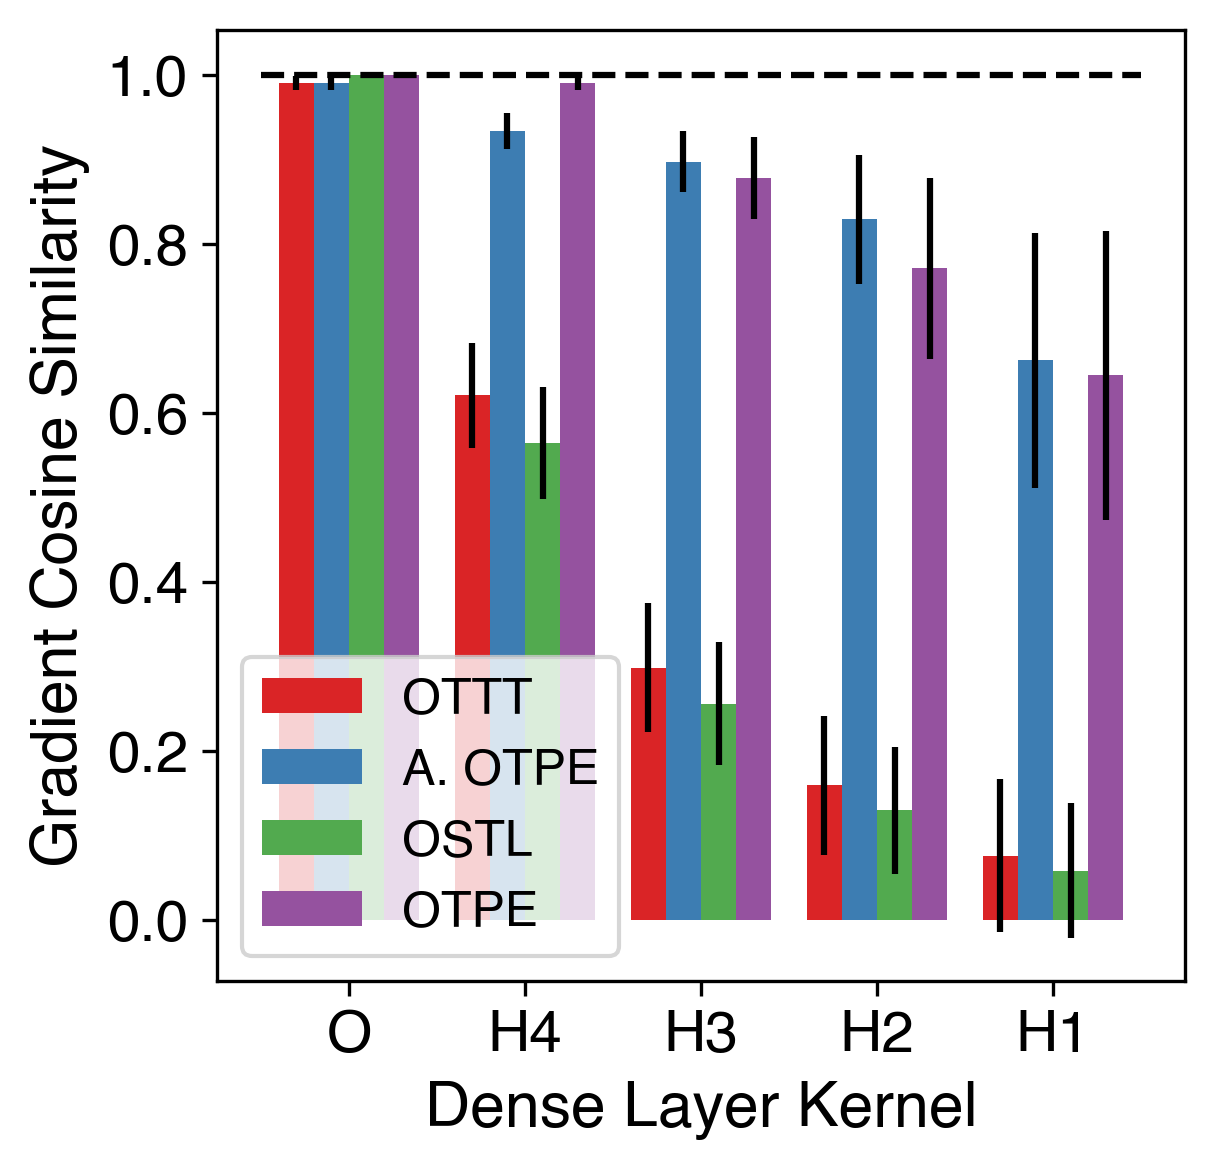

In [101]:
n_layers = 5
layer_sz = 512
slope = 25
lr = "001"
encode = "rate"
update = "offline"
measure = "layer_cosine_similarity"

data = []
for k in range(4):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
data = jnp.stack(data)
print(jnp.mean(data[:,-1],axis=0))


if encode == 'rate':
    fig = plt.figure(figsize=(4.15,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight')

vals = data

stds = jnp.nanstd(vals,axis=(0,1))[:,1::2]
means = jnp.mean(vals,axis=(0,1))[:,1::2]

plt.bar(jnp.arange(means.shape[1])-0.3,means[0],width=0.2,color=sb.desaturate(colors[0],0.9),yerr=stds[0])
plt.bar(jnp.arange(means.shape[1])-0.1,means[1],width=0.2,color=sb.desaturate(colors[1],0.9),yerr=stds[1])
plt.bar(jnp.arange(means.shape[1])+0.1,means[2],width=0.2,color=sb.desaturate(colors[2],0.9),yerr=stds[2])
plt.bar(jnp.arange(means.shape[1])+0.3,means[3],width=0.2,color=sb.desaturate(colors[3],0.9),yerr=stds[3])

plt.xticks([0,1,2,3,4],labels=['H1', 'H2', 'H3', 'H4', 'O'][::-1])

plt.legend(['OTTT','A. OTPE','OSTL','OTPE'], loc='lower left',fontsize=12)
plt.xlabel('Dense Layer Kernel',fontsize=15)
if encode=='rate':
    plt.ylabel("Gradient Cosine Similarity",fontname="Helvetica",fontsize=15)

plt.hlines(1,-0.5,4.5,'k',linestyle='dashed')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('plots/shd_offline_s25_1e-3_512_5_lcos.png')

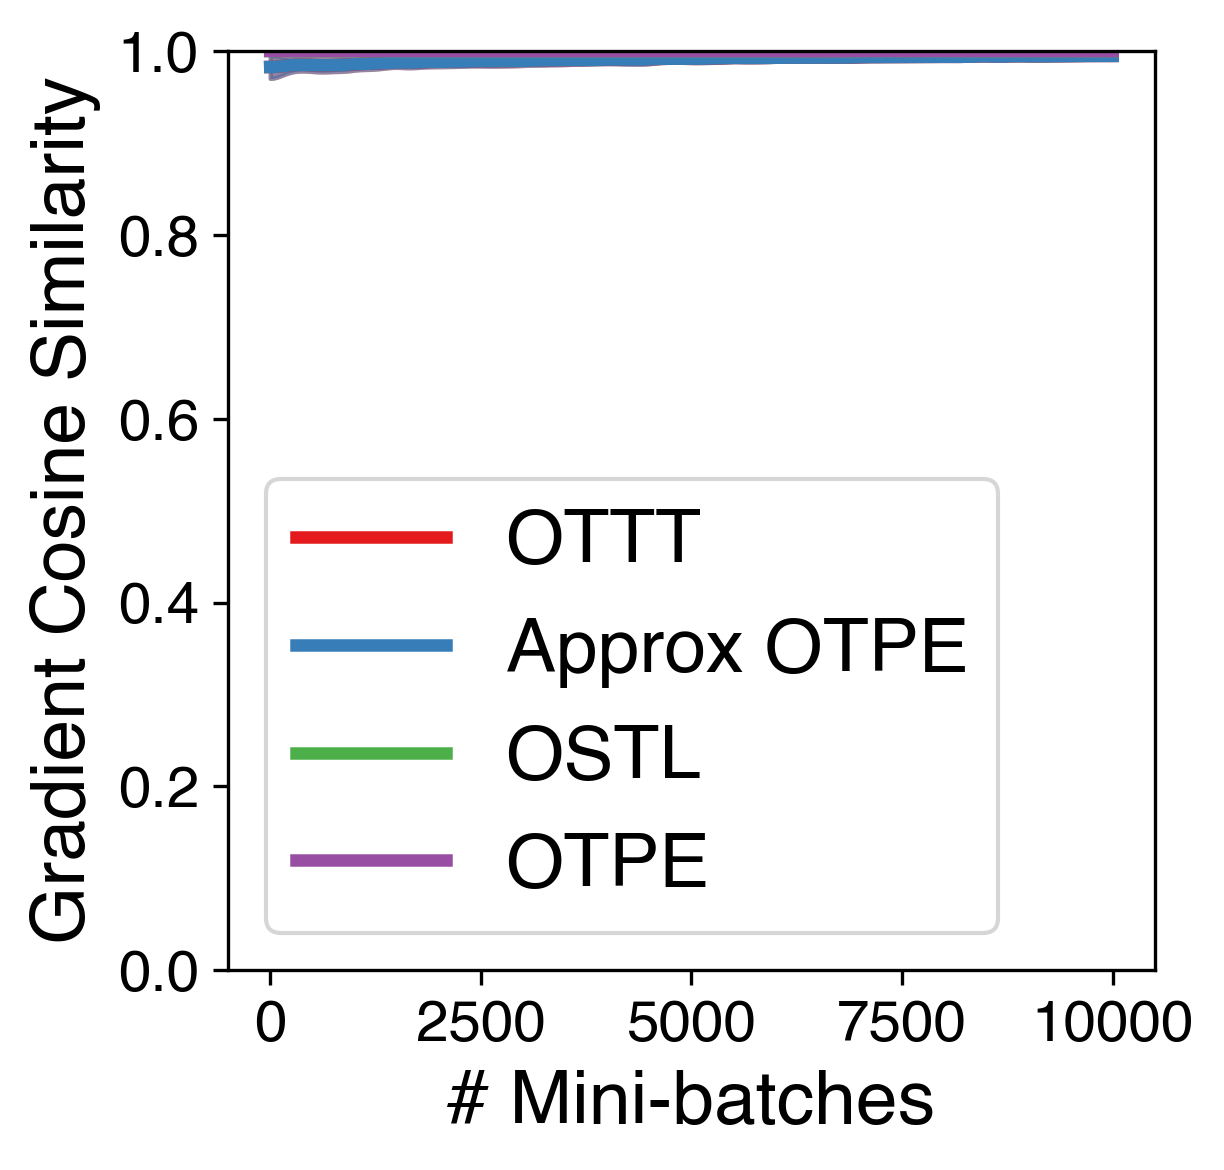

In [109]:
n_layers = 3
layer_sz = 512
slope = 25
lr = "001"
encode = "rate"
update = "offline"
measure = "layer_cosine_similarity"


data = []
for k in range(4):
    data.append(jnp.load("SHD_data/{}/sim_{}layer_{}_50seqlen_10000iter_{}_sub_{}fs_adamax_lr{}_{}seed.npy".format(measure,n_layers,layer_sz,update,slope,lr,k)))
data = jnp.stack(data)
data = data[:,:,:,1]

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
means = jnp.mean(data,axis=0)
stds = jnp.std(data,axis=0)
if encode == 'rate':
    fig = plt.figure(figsize=(4.18,4),layout='tight',dpi=300)
else:
    fig = plt.figure(figsize=(4,4),layout='tight',dpi=300)

upper = means + stds
lower = means - stds

means = gaussian_filter1d(means.T, sigma=100).T
upper = gaussian_filter1d(upper.T, sigma=100).T
lower = gaussian_filter1d(lower.T, sigma=100).T

plt.ylim((0,1))
plt.xlabel("# Mini-batches",fontname='Helvetica',fontsize=18)
if encode=='rate':
    plt.ylabel("Gradient Cosine Similarity",fontname="Helvetica",fontsize=18)
for i in range(4):
    plt.plot(means[:,i],linewidth=3,color=colors[i])

for i in range(4):
    plt.fill_between(jnp.arange(10000), lower[:,i], upper[:,i], alpha=0.5,color=colors[i])

if encode=='rate':
    plt.legend(['OTTT','Approx OTPE','OSTL','OTPE'], loc='lower left',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('plots/shd_offline_s25_1e-3_512_3_lcos1.png')